In [ ]:
import pandas as pd
import csv
import numpy as np
import sklearn
import nltk # natural language toolkit
import matplotlib.pyplot as plt
import seaborn as sns
import re # regular expression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import scikitplot as skplt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


In [ ]:
predictors = pd.read_csv("X_pca.csv", header = None)
response = pd.read_csv("y_sentimentonly.csv")
response = response["sentiment"]
predictors.shape

(50000, 50)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, test_size = 0.3, random_state = 9)

# KNN

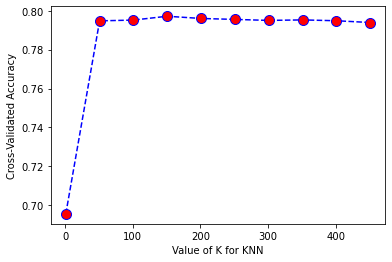

In [ ]:
# choose k
k_range = range(1, 501,50)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores, color="blue", linestyle= "dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

Using the graph, we see that a k value of 151 is the best as it has the highest accuracy among k values

In [ ]:
knn = KNeighborsClassifier(n_neighbors=151)
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
scores.mean()

0.7971714285714284

^ Cross validation score on the training data

In [ ]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# compute accuracy of the model
knn.score(X_test, y_test)

# compute the classification report
print(classification_report(y_test, y_pred, digits = 5 ))

              precision    recall  f1-score   support

    negative    0.81702   0.75894   0.78691      7525
    positive    0.77353   0.82890   0.80026      7475

    accuracy                        0.79380     15000
   macro avg    0.79528   0.79392   0.79358     15000
weighted avg    0.79535   0.79380   0.79356     15000



^ Testing dataset accuracy is 79.38% which is very close (79.7-79.38 = 0.32 percent close) to the cross validation accuracy on the training set illustrating that there is minimal overfitting

In [ ]:
knn_y_proba = knn.predict_proba(X_test)

C:\Users\Tyler\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


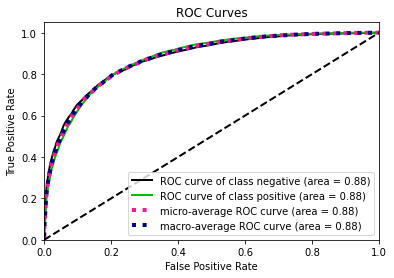

In [ ]:
skplt.metrics.plot_roc_curve(y_test, knn_y_proba )
plt.show()

# Logistic Regression

In [ ]:
log_model = LogisticRegression(penalty = 'l2')
parameters = {'C':[0.01, 0.1, 0.5 ,1, 2, 3,4, 5, 6, 7, 8,9, 10, 20, 35, 50, 75, 100]}
cv =  GridSearchCV(log_model, parameters)
cv.fit(X_train, y_train)
cv.best_params_

{'C': 5}

We use l2 penalty and use cross validation to find our penalty term. We find that a C=5 is the best

In [ ]:
best_log = LogisticRegression(penalty ="l2", C =5)
scores2 = cross_val_score(best_log, X_train, y_train, cv=5, scoring='accuracy')
scores2.mean()

0.8444

Cross validation on training set has 84.4 percent accuracy

In [ ]:
best_log.fit(X_train, y_train)
y_pred2 = best_log.predict(X_test)

# compute accuracy of the model
best_log.score(X_test, y_test)

# compute the classification report
print(classification_report(y_test, y_pred2, digits = 5 ))

              precision    recall  f1-score   support

    negative    0.85708   0.82485   0.84066      7525
    positive    0.83011   0.86154   0.84553      7475

    accuracy                        0.84313     15000
   macro avg    0.84360   0.84319   0.84310     15000
weighted avg    0.84364   0.84313   0.84309     15000



See that our testing accuracy is 84.313 percent which illustrates little overfitting

C:\Users\Tyler\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


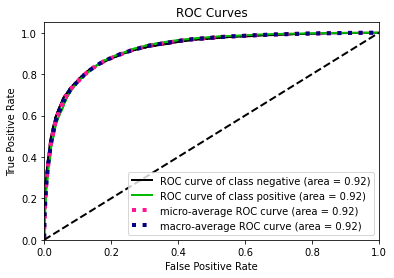

In [ ]:
log_y_proba = best_log.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, log_y_proba )
plt.show()

# LDA

In [ ]:
LDA = LinearDiscriminantAnalysis()
scores3 = cross_val_score(LDA, predictors, response, cv=5, scoring='accuracy')
scores3.mean()

0.83788

cross validation on training set ^

In [ ]:
LDA.fit(X_train, y_train)
y_pred3 = LDA.predict(X_test)

# compute accuracy of the model
LDA.score(X_test, y_test)

# compute the classification report
print(classification_report(y_test, y_pred3, digits = 5 ))

              precision    recall  f1-score   support

    negative    0.86254   0.80385   0.83216      7525
    positive    0.81520   0.87104   0.84219      7475

    accuracy                        0.83733     15000
   macro avg    0.83887   0.83745   0.83718     15000
weighted avg    0.83895   0.83733   0.83716     15000



Again little overfitting as difference is little ^

C:\Users\Tyler\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


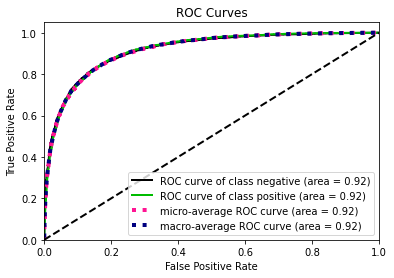

In [ ]:
LDA_y_proba = LDA.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, LDA_y_proba )
plt.show()

# QDA

In [ ]:
QDA = QuadraticDiscriminantAnalysis()
scores4 = cross_val_score(QDA, predictors, response, cv=5, scoring='accuracy')
scores4.mean()

0.78184

In [ ]:
QDA.fit(X_train, y_train)
y_pred4 = QDA.predict(X_test)

# compute accuracy of the model
QDA.score(X_test, y_test)

# compute the classification report
print(classification_report(y_test, y_pred4, digits = 5 ))

              precision    recall  f1-score   support

    negative    0.80125   0.75110   0.77536      7525
    positive    0.76428   0.81244   0.78763      7475

    accuracy                        0.78167     15000
   macro avg    0.78277   0.78177   0.78149     15000
weighted avg    0.78283   0.78167   0.78147     15000



C:\Users\Tyler\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


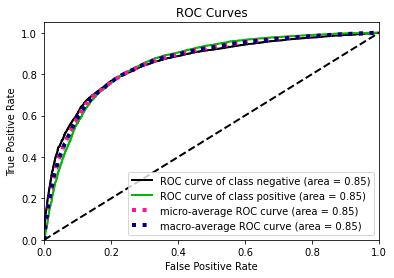

In [ ]:
QDA_y_proba = QDA.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, QDA_y_proba )
plt.show()

# Random Forest

In [ ]:
rf = RandomForestClassifier()
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


0.8149200000000001

In [ ]:
tree_range = range(1,500,25)
t_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for t in tree_range:
    forest = RandomForestClassifier(n_estimators = t)
    forest.fit(X_train, y_train)
    y_pred = forest.predict(X_test)

 # compute accuracy of the model
    t_scores.append(forest.score(X_test, y_test))



REWORD I COPIED AND PASTED THIS FROM ONLINE


Q2. What is Hyperparameter tuning in decision trees and random forests?


A. Hyperparameter tuning in decision trees and random forests involves adjusting the settings that aren’t learned from data but influence model performance. It aims to find the optimal values for parameters like tree depth, number of trees, and feature selection methods. By iteratively testing different combinations through techniques like grid search or random search, the goal is to enhance model accuracy and generalization on unseen data.

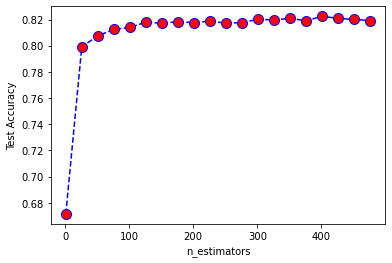

In [ ]:
# plot to see clearly
plt.plot(tree_range, t_scores, color="blue", linestyle= "dashed", marker="o",
 markerfacecolor="red", markersize=10)
plt.xlabel("n_estimators")
plt.ylabel('Test Accuracy')
plt.show()

REWORD THIS I COPIED AND PASTED FROM ARTICLE
https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/


We know that a Random Forest algorithm is nothing but a grouping of trees. But how many trees should we consider? That’s a common question fresher data scientists ask. And it’s a valid one!

We might say that more trees should be able to produce a more generalized result, right? But by choosing more number of trees, the time complexity of the Random Forest model also increases.

In this graph, we can clearly see that the performance of the model sharply increases and then stagnates at a certain level:This means that choosing a large number of estimators in a random forest model is not the best idea. Although it will not degrade the model, it can save you the computational complexity and prevent the use of a fire extinguisher on your CPU

In [ ]:
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

We use cross validation via grid search to find other best hyperparameters and find that in addition to n_estimators = 100, the
max_features =  "auto",
max_depth = 100,
min_samples_split = 12,
min_samples_leaf = 4,
bootstrap= True
are the best hyperparameters off of cross validation

In [ ]:
best_forest = RandomForestClassifier(n_estimators = 100,
                                     max_features =  "auto",
                                     max_depth = 100,
                                     min_samples_split = 12,
                                     min_samples_leaf = 4,
                                     bootstrap= True)
scores6 = cross_val_score(best_forest, predictors, response, cv=5, scoring='accuracy')
scores6.mean()

0.8138400000000001

In [ ]:
best_forest.fit(X_train, y_train)
y_pred5 = best_forest.predict(X_test)

# compute accuracy of the model
best_forest.score(X_test, y_test)

# compute the classification report
print(classification_report(y_test, y_pred5, digits = 5 ))

              precision    recall  f1-score   support

    negative    0.82395   0.80545   0.81460      7525
    positive    0.80848   0.82676   0.81751      7475

    accuracy                        0.81607     15000
   macro avg    0.81622   0.81610   0.81606     15000
weighted avg    0.81624   0.81607   0.81605     15000



C:\Users\Tyler\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


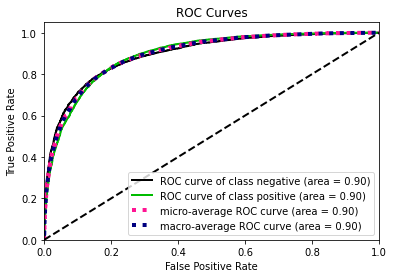

In [ ]:
rf_y_proba = best_forest.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, rf_y_proba )
plt.show()

https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7

https://medium.com/@rithpansanga/logistic-regression-and-regularization-avoiding-overfitting-and-improving-generalization-e9afdcddd09d

https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec

https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

https://www.sharpsightlabs.com/blog/scikit-learn-roc_curve/


In [ ]:
data = {"KNN": 79.380,
        "Logistic Regression" : 84.313,
        "LDA" : 83.733,
        "QDA" : 78.167,
        "Random Forest" :81.607}
print(data)

{'KNN': 79.38, 'Logistic Regression': 84.313, 'LDA': 83.733, 'QDA': 78.167, 'Random Forest': 81.607}
